In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('C:/Users/RUTU/Desktop/Data Science/DS_New Assi/SVM/SVM/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


### 1. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


ValueError: num must be an integer with 1 <= num <= 24, not 25

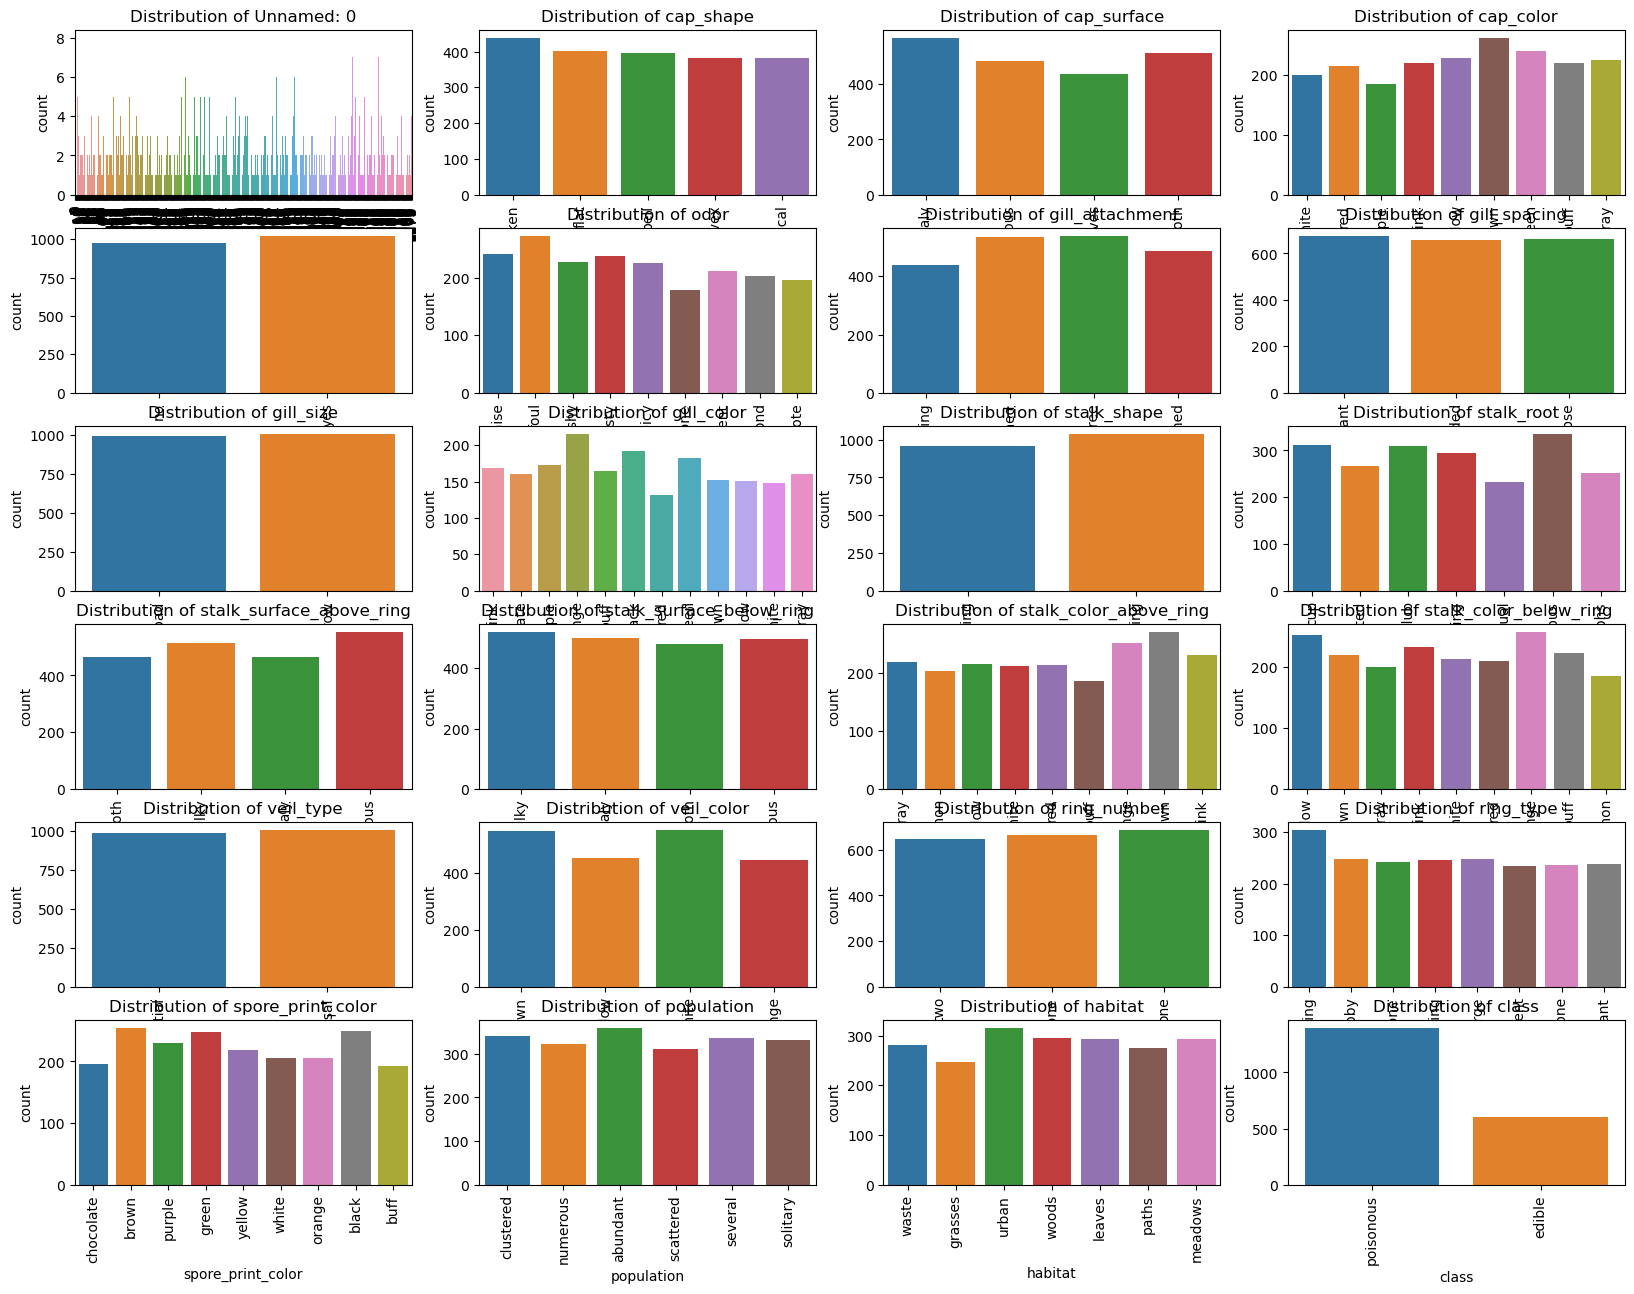

In [5]:
# Set the plot size
plt.figure(figsize=(20, 15))

# Loop through each column to plot histograms
for i, column in enumerate(df.columns):
    plt.subplot(6, 4, i + 1)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

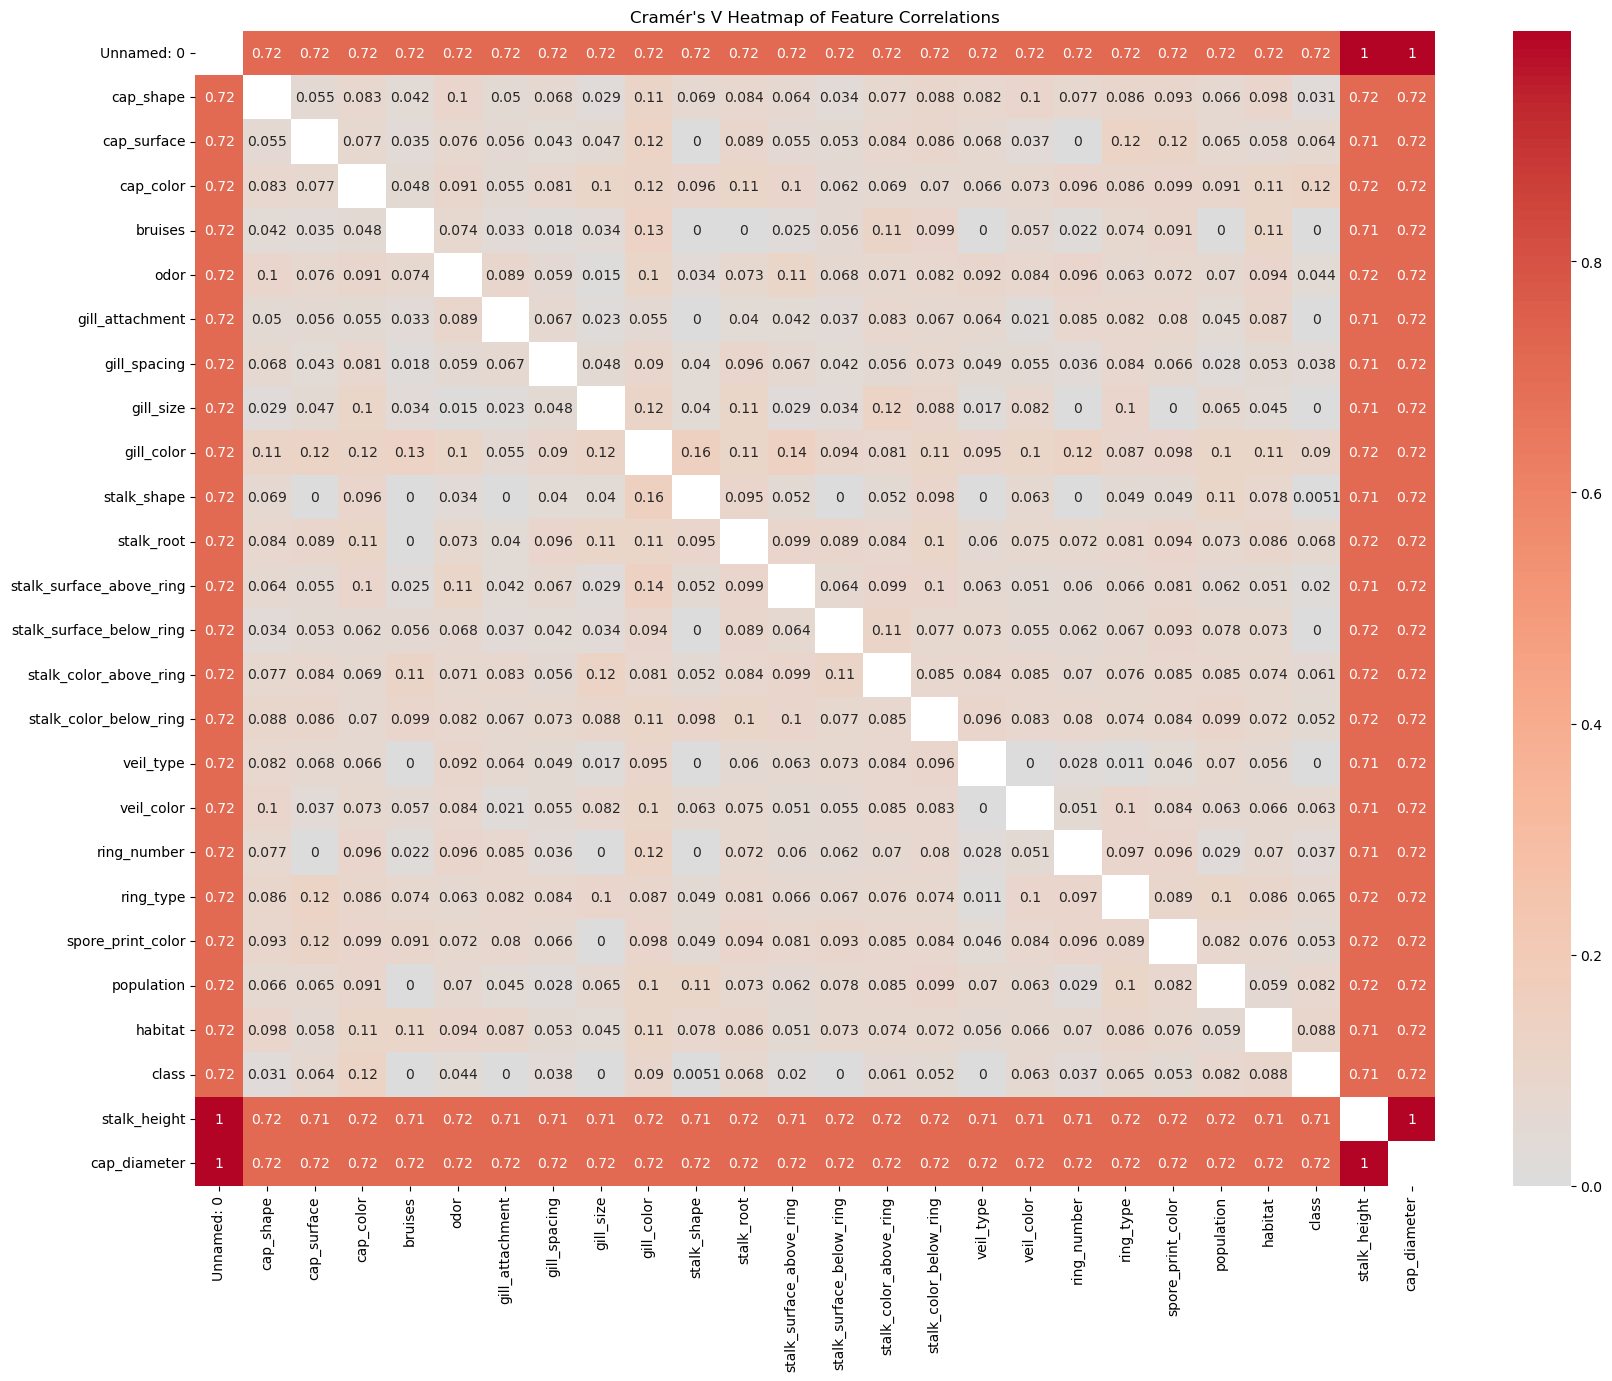

In [6]:
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / n
    kcorr = k - ((k - 1) ** 2) / n
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for each pair of categorical variables
columns = df.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

# Convert to numeric and plot the heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(20, 15))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Cramér\'s V Heatmap of Feature Correlations')
plt.show()


### 2. Data Preprocessing

In [7]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()
df_encoded

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1037,3.952715,19.068319,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,309,9.054265,7.205884,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,282,5.226499,20.932692,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,820,14.037532,12.545245,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,5.877891,17.464145,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1996,1160,6.500840,13.501957,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1997,265,13.558064,11.270020,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1998,411,11.092703,8.423199,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1


In [8]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df_encoded.drop('class_poisonous', axis=1)
y = df_encoded['class_poisonous']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 105), (400, 105), (1600,), (400,))

### 3. Data Visualization:

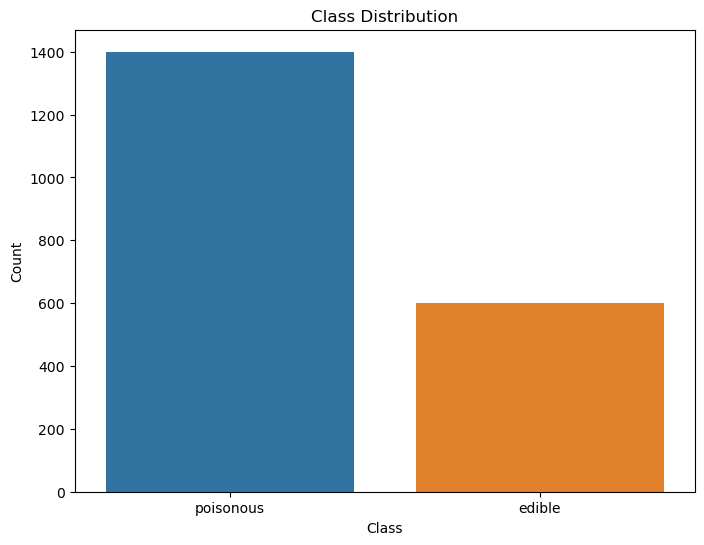

In [9]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### 4. SVM Implementation:

In [10]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.68
Precision: 0.68
Recall: 0.95
F1-score: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.12      0.20       133
           1       0.68      0.95      0.80       267

    accuracy                           0.68       400
   macro avg       0.62      0.54      0.50       400
weighted avg       0.64      0.68      0.60       400



### 5.Visualization of SVM Results:

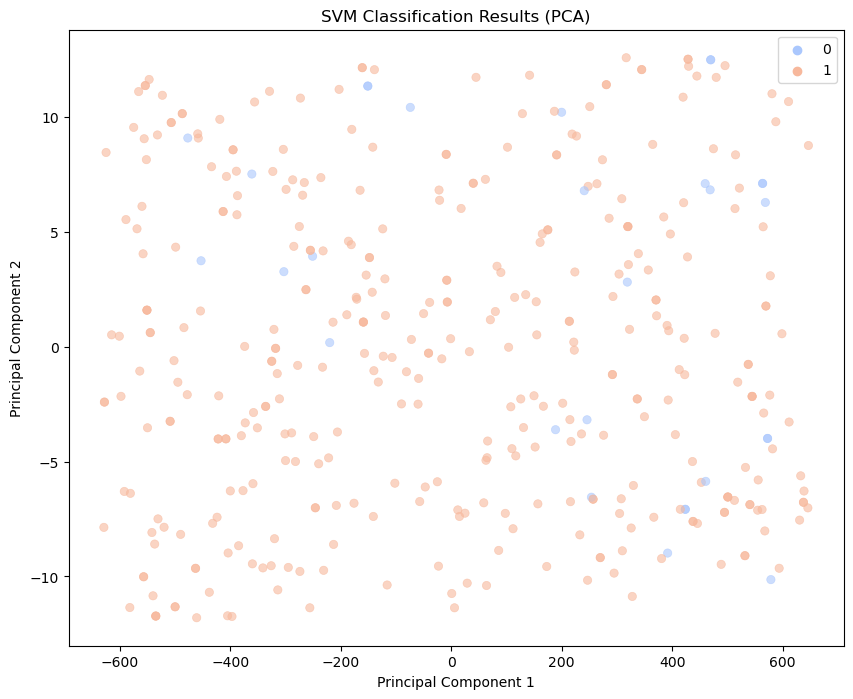

In [12]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the classification results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm', alpha=0.6, edgecolor=None)
plt.title('SVM Classification Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### 6. Parameter Tuning and Optimization:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')


### 7. Comparision and Analysis:

In [ ]:
# Train and evaluate SVM with different kernels using the best parameters
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Kernel: {kernel} - Accuracy: {accuracy:.2f}')


#### This discussion can cover aspects such as:

1.SVM's ability to handle high-dimensional data.
2.The importance of choosing the right kernel
3. The impact of regularization and hyperparameter tuning on model performance.
4. Potential real-world applications and limitations of SVM